# Rol de las Capas Ocultas de una ANN


In [266]:
# imports
from sklearn.datasets import make_moons

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

import matplotlib.pyplot as plt

## Generacion de n datos etiquetados

In [207]:
def get_moons(n, plot=False):
    """
    Creacion de n datos etiquetados los cuales no pueden ser separados linealmente
    Parametros:
        name    type    description
        n       int     Cantidad de datos a generar
        plot    bool    Si se desea graficar los puntos
    """
    X, y = make_moons(500, noise=0.2)
    if plot:
        plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral, marker='.')
        plt.show()
    y=to_categorical(y)
    return X,y

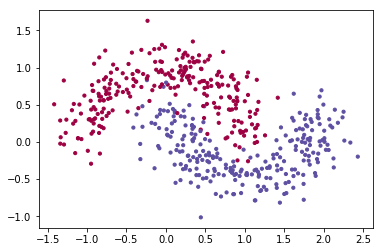

In [208]:
# se crean los conjuntos de entrenamiento y puebas a utilizar
X_train, y_train = get_moons(500, True)
X_test,  y_test  = get_moons(500)

## Neurona artificial indivdual
<p>Para estudiar la capacidad de clasificación de una neurona individual para el dataset creado en el punto anterior. Se crea una neurona cuya fusión de activación será la <i>softmax</i>, el método de optimización a utilizar será el <i>Stochastic gradient descent optimizer</i>, y la función de perdida corresponde a una <i>categorical crossentropy</i></p>

In [255]:
# definición de la neurona
model = Sequential()
model.add(Dense(2, input_dim=X.shape[1], activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# se entrena la neurona
history = model.fit(X_train, y_train, epochs=1000, verbose=0)

<p>Se evalua la calidad del modelo generado</p>

In [260]:
scores = model.evaluate(X_test, y_test)
scores[1] * 100

 32/500 [>.............................] - ETA: 0s

86.599999904632568

<p>Al evaluar el modelo con el conjunto de pruebas, se obtiene una precisión igual a un 86.6%, lo que significa que 67 de los 500 datos del dataset de pruebas son mal clasificados por el modelo creado.</p>
<p>Para comprender mejor el comportamiento de la neurona, se grafican los valores de <i>accuracy</i> y de <i>loss</i> asociados a la neurona en función de las iteraciones realizadas en el entrenamiento</p>

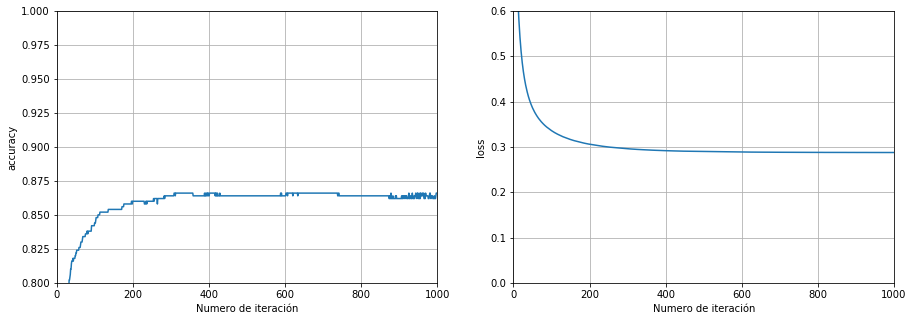

In [256]:
plt.figure(1,figsize=(15,5))

plt.subplot(121)
plt.plot(history.history['acc'])
plt.axis([0, 1000, .8, 1])
plt.xlabel(u'Numero de iteración')
plt.ylabel('accuracy')
plt.grid(True)

plt.subplot(122)
plt.plot(history.history['loss'])
plt.axis([0, 1000, 0, 0.6])
plt.xlabel(u'Numero de iteración')
plt.ylabel('loss')
plt.grid(True)
plt.show()

<p>Como es posible apreciar, se presenta un estancamiento del rendimiento de la neurona cercano a la iteración 400, es decir después de la iteración 400 la neurona no es capaz de aprender más, implicando que no es posible mejorar la clasificación realizada por está, por lo que se puede concluir que con una neurona no se puede clasificar correctamente todos los datos creados.</p>


## Red multi capa de neuronas artificiales
<p>Para estudiar el comportamiento de una red multi capa de neuronas artificiales, se crea una red donde la estructura de las capas ocultas es la siguiente, la primera capa está conformada por 10 neuronas cuya función de activación es <i>relu</i>, la segunda capa por 10 neuronas cuya función también es <i>relu</i>, la tercera capa con 10 neuronas con la función <i>softmax</i>, y finalmente la capa de salida la cual utiliza la función de activación <i>softmax</i>, el método de optimización a utilizar será el <i>Stochastic gradient descent optimizer</i>, y la función de perdida corresponde a una <i>categorical crossentropy</i>p>

In [267]:
# definición de la neurona
model = Sequential()
model.add(Dense(10, input_dim=X.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# se entrena la neurona
history = model.fit(X, y, epochs=1000, verbose=0)

<p>Se evalua la calidad del modelo generado</p>

In [272]:
scores = model.evaluate(X_test, y_test)
scores[1] * 100

 32/500 [>.............................] - ETA: 0s

98.19999995231629

<p>Al evaluar el modelo con el conjunto de pruebas, se obtiene una precisión igual a un 98,2%, lo que significa que 9 de los 500 datos del dataset de pruebas son mal clasificados por el modelo creado, lo cual implica que el modelo de clasificación creado, clasifica correctamente los datos, con un error reducido.  </p>
<p>Para comprender mejor el comportamiento de la neurona, se grafican los valores de <i>accuracy</i> y de <i>loss</i> asociados a la neurona en función de las iteraciones realizadas en el entrenamiento</p>

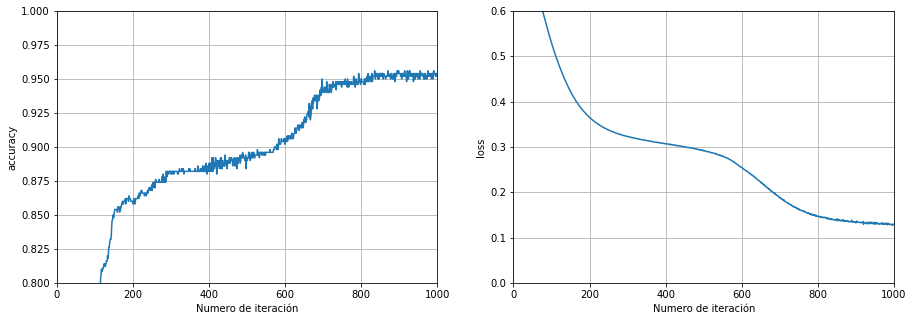

In [273]:
plt.figure(1,figsize=(15,5))

plt.subplot(121)
plt.plot(history.history['acc'])
plt.axis([0, 1000, .8, 1])
plt.xlabel(u'Numero de iteración')
plt.ylabel('accuracy')
plt.grid(True)

plt.subplot(122)
plt.plot(history.history['loss'])
plt.axis([0, 1000, 0, 0.6])
plt.xlabel(u'Numero de iteración')
plt.ylabel('loss')
plt.grid(True)
plt.show()

<p>De los gráficos anteriores es posible apreciar la ausencia de tramos con un estancamiento prolongado, lo cual puede indicar que, con una mayor cantidad de iteraciones la red de neuronas podría llegar a mejorar la clasificación realizada, de igual manera es posible apreciar una mayor tasa de precisión en comparación al modelo compuesto por una única neurona, y que el valor de <i>los</i> es considerablemente menor que el obtenido en el modelo de una neurona. </p>
<p>Con toda la información presentada con anterioridad, es posible determinar que el modelo de multi capas de neuronas creado, es un modelo válido para la clasificación del conjunto de datos creado</p>